In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

Load DataSets:

In [15]:
data_dir=os.path.join('data')

In [16]:
img=cv2.imread(os.path.join('data'))

In [17]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 3000 files belonging to 2 classes.


In [18]:
 data_iterator=data.as_numpy_iterator()

In [19]:
batch=data_iterator.next()

In [20]:
#images as numpy array
batch[0].shape

(32, 256, 256, 3)

In [21]:
batch[1].shape

(32,)

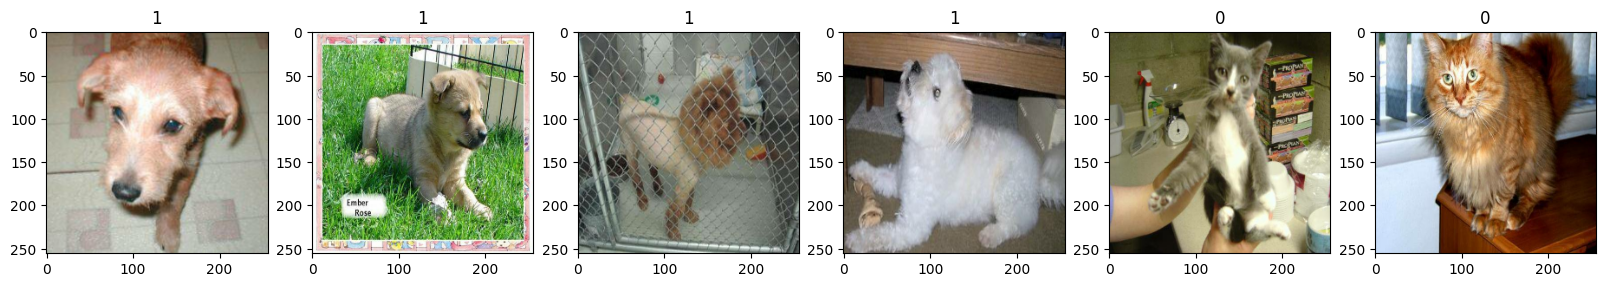

In [22]:
fig, ax=plt.subplots(ncols=6,figsize=(20,20))
for idx,img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Cats is equal=0
Dogs is equal=1

Preprocess Data

Scale Data:

In [2]:
data=tf.keras.utils.image_dataset_from_directory('data',image_size=(150, 150),shuffle=True)

Found 8002 files belonging to 2 classes.


In [3]:
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [4]:
s_iter=data.as_numpy_iterator()

In [5]:
batch=s_iter.next()

In [6]:
print(batch[0].max())
print(batch[0].min())

1.0
0.0


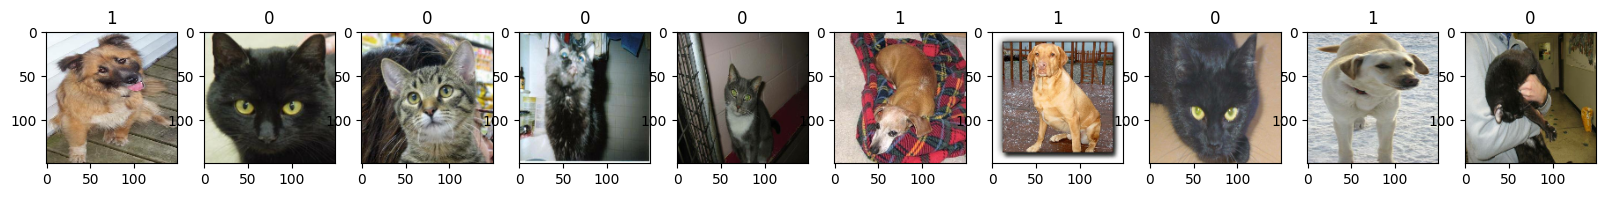

In [7]:
fig, ax=plt.subplots(ncols=10,figsize=(20,20))
for idx,img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split Data into Test and Train

In [8]:
len(data)

251

In [11]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [12]:
test_size+train_size+val_size

251

In [13]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

Deep Learning Model:

In [14]:
model = Sequential(
    [
        tf.keras.layers.Input(shape=(150,150,3)),
        Conv2D(100, (3,3), 1, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        MaxPooling2D(),
        Conv2D(50, (3,3), 1, activation='relu'),
        MaxPooling2D(),
        Conv2D(16, (3,3), 1, activation='relu'),
        MaxPooling2D(),
        Conv2D(32, (3,3), 1, activation='relu'),
        MaxPooling2D(),
        Dropout(0.5),
        Flatten(),
        Dense(150,activation='relu'),
        Dense(50,activation='relu'),
        Dense(1,activation='sigmoid'),

])



In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 50)        45050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 16)        7216      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

In [17]:
logdir='logs'

In [18]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
175/175 [==============================] - 105s 593ms/step - loss: 0.7118 - accuracy: 0.5055 - val_loss: 0.6945 - val_accuracy: 0.4994
Epoch 2/30
175/175 [==============================] - 99s 562ms/step - loss: 0.6938 - accuracy: 0.5204 - val_loss: 0.6912 - val_accuracy: 0.5206
Epoch 3/30
175/175 [==============================] - 99s 565ms/step - loss: 0.6851 - accuracy: 0.5598 - val_loss: 0.6951 - val_accuracy: 0.5381
Epoch 4/30
175/175 [==============================] - 100s 569ms/step - loss: 0.6684 - accuracy: 0.5895 - val_loss: 0.6484 - val_accuracy: 0.6119
Epoch 5/30
175/175 [==============================] - 98s 561ms/step - loss: 0.6516 - accuracy: 0.6189 - val_loss: 0.6301 - val_accuracy: 0.6425
Epoch 6/30
175/175 [==============================] - 99s 568ms/step - loss: 0.6277 - accuracy: 0.6559 - val_loss: 0.6264 - val_accuracy: 0.6444
Epoch 7/30
175/175 [==============================] - 98s 557ms/step - loss: 0.6179 - accuracy: 0.6618 - val_loss: 0.6422 - val_

In [51]:
hist.history

{'loss': [0.6938632726669312,
  0.6903591752052307,
  0.6768344640731812,
  0.6596282720565796,
  0.6516752243041992,
  0.6365800499916077,
  0.6091360449790955,
  0.6005380749702454,
  0.5811172723770142,
  0.5493879318237305,
  0.5360450148582458,
  0.500345766544342,
  0.4753349721431732,
  0.434643417596817,
  0.38694003224372864,
  0.3860134482383728,
  0.3311527967453003,
  0.3047582507133484,
  0.307860404253006,
  0.27473610639572144,
  0.2289157211780548,
  0.23101942241191864,
  0.18694832921028137,
  0.1780972182750702,
  0.16787603497505188,
  0.14101563394069672,
  0.13710519671440125,
  0.13854171335697174,
  0.1352238655090332,
  0.10338791459798813],
 'accuracy': [0.4927884638309479,
  0.5278846025466919,
  0.5783653855323792,
  0.5879807472229004,
  0.6192307472229004,
  0.6278846263885498,
  0.668749988079071,
  0.6673076748847961,
  0.6990384459495544,
  0.7192307710647583,
  0.7307692170143127,
  0.7514423131942749,
  0.7701923251152039,
  0.7956730723381042,
  0.82

Plot Performance:

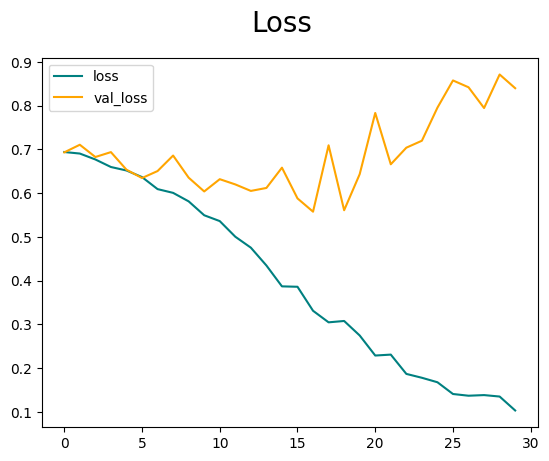

In [52]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

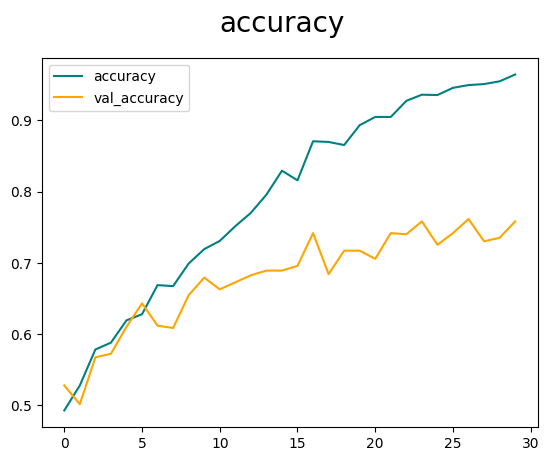

In [53]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate Performance: 

In [54]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [55]:
pre = Precision()
re= Recall()
acc = BinaryAccuracy()

In [56]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 153ms/step


In [57]:
print(f'Precision{pre.result()},Recall{re.result()},Accuracy{acc.result()}')

Precision0.6966292262077332,Recall0.7654321193695068,Accuracy0.7051281929016113


Test:

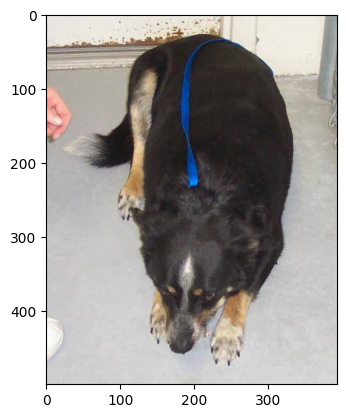

In [9]:
img=cv2.imread('test_dir/24.JPG')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

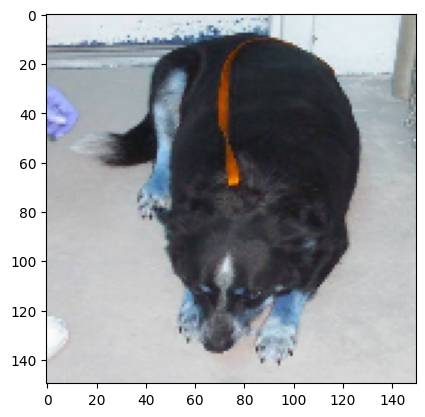

In [10]:
resize=tf.image.resize(img,(150,150))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [11]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 21ms/step


In [12]:
yhat

array([[0.99914455]], dtype=float32)

In [13]:
if yhat > 0.5:
    print('This is a DOG')
else:
    print('This is a CAT')

This is a DOG


Save The Model

In [64]:
from tensorflow.keras.models import load_model

In [65]:
model.save(os.path.join('model','CatandDogmodel.h5'))

In [66]:
new_model=load_model(os.path.join('model','CatandDogmodel.h5'))

In [67]:
y_hat=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 75ms/step


In [68]:
if yhat > 0.5:
    print('This is a DOG')
else:
    print('This is a CAT')

This is a CAT


Load_models after sometime

In [2]:
from keras import models    
model = models.load_model(os.path.join('model','CatandDogmodel.h5'))